In [2]:
import os, sys
import pandas as pd
import pybedtools as pbt
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append("/dors/capra_lab/users/fongsl/tools/py_")
import config_readwrite as crw
import fet
import plot_params as pp
pp.fonts()

('sans-serif', 'Arial', 18)

# functions

In [3]:
def check_section(config, section):
    if config.has_section(section) is False:
        config.add_section(section)
        
    return config

def pbtInt(a, b, out):
    A, B = pbt.BedTool(a), pbt.BedTool(b)
    
    C = A.intersect(B, wao=True, output=out)
    
    return C

# config

In [4]:
cfn = os.path.join(os.path.dirname(os.getcwd()), "config")
config, cfn = crw.read_config(cfn)

## read

In [5]:
# read
BED = config["CIS_TRANS"]["regions"]
ANNOT = config["CIS_TRANS"]["regions_annotations"]
SHUF=config["SHUFFLES"]["shuf-all"]

## write

In [6]:
section = 'FANTOM'
config = check_section(config, section)

RE = "/data/hodges_lab/ATAC-STARR_B-cells/results/results_human-evolution/FANTOM"
GM = "/data/hodges_lab/ATAC-STARR_B-cells/data/hansen-fong/fantom/CL_0000945_lymphocyte_of_B_lineage_expressed_enhancers.liftOver.to.Hg38.bed"
out = os.path.join(RE, "regions.x.FANTOM_Bcell.bed")
out_shuf = os.path.join(RE, "shuf.regions.x.GM12878.cCRE.bed")


config[section]["bcell"] = GM
config[section]["results"] = RE
config[section]["regions.x.bcell"] = out
config[section]["shufregions.x.bcell"] = out_shuf

out_results = os.path.join(RE, "regions.x.FANTOM.BCell.enrichments.tsv")
config[section]["regions.x.FANTOM.BCell.results"] = out_results


crw.write(config, cfn)

# intersection

## make results 

In [7]:
if os.path.exists(RE) is False:
    os.mkdir(RE)

## test

In [8]:

if os.path.exists(out) is False:
    C = pbtInt(BED, GM, out)


## shuf

In [9]:

if os.path.exists(out_shuf) is False:
    C = pbtInt(SHUF, GM, out_shuf)

# review results

## atac-starr

In [10]:
df = pd.read_csv(out, sep='\t', header=None, usecols=[1,2,3,4,5,6,7,16])
df.loc[df[16]>0]

,1,2,3,4,5,6,7,16
20,2301148,2301268,chr1:2301148-2301268,chr1,2300989,2301457,chr1:2232428-2232896,120
95,12152888,12153158,chr1:12152888-12153158,chr1,12153071,12153826,chr1:12213128-12213883,87
96,12153168,12153338,chr1:12153168-12153338,chr1,12153071,12153826,chr1:12213128-12213883,170
97,12153358,12153688,chr1:12153358-12153688,chr1,12153071,12153826,chr1:12213128-12213883,330
108,13702693,13703043,chr1:13702693-13703043,chr1,13702582,13703384,chr1:14029077-14029879,350
...,...,...,...,...,...,...,...,...
16822,131729323,131729743,chr9:131729323-131729743,chr9,131729187,131729787,chr9:134604574-134605174,420
16823,131732914,131733004,chr9:131732914-131733004,chr9,131732862,131733448,chr9:134608249-134608835,90
16837,133133600,133133830,chr9:133133600-133133830,chr9,133133744,133134071,chr9:136009131-136009458,86
16838,133133960,133134070,chr9:133133960-133134070,chr9,133133744,133134071,chr9:136009131-136009458,110


In [11]:
names = ["#chr", "start", "end", "region_id", "chr_cCRE", "startcCRE", "endcCRE", 'cCRE_id', "len"]
df = pd.read_csv(out, sep='\t', header=None, usecols=[0,1,2,3,4,5,6,7,16], )
df.columns=names
print(df.shape, df.loc[df["len"]>0].shape[0])

df.head()

(16901, 9) 586


,#chr,start,end,region_id,chr_cCRE,startcCRE,endcCRE,cCRE_id,len
0,chr1,959034,959154,chr1:959034-959154,.,-1,-1,.,0
1,chr1,1002089,1002179,chr1:1002089-1002179,.,-1,-1,.,0
2,chr1,1064140,1064260,chr1:1064140-1064260,.,-1,-1,.,0
3,chr1,1214948,1215208,chr1:1214948-1215208,.,-1,-1,.,0
4,chr1,1215328,1215508,chr1:1215328-1215508,.,-1,-1,.,0


## shuffles

In [12]:
shuf = pd.read_csv(out_shuf, sep='\t', header=None, usecols=[0,1,2,3,4,5,6,7,16], )
shuf.columns=names
print(shuf.shape, shuf.loc[shuf["len"]>0].shape[0])
shuf.head()

(168983, 9) 2522


,#chr,start,end,region_id,chr_cCRE,startcCRE,endcCRE,cCRE_id,len
0,chr5,115170417,115170537,chr1:959034-959154,.,-1,-1,.,0
1,chr4,37686249,37686339,chr1:1002089-1002179,.,-1,-1,.,0
2,chr20,32762661,32762781,chr1:1064140-1064260,.,-1,-1,.,0
3,chr7,98133420,98133680,chr1:1214948-1215208,.,-1,-1,.,0
4,chr1,84689773,84689953,chr1:1215328-1215508,.,-1,-1,.,0


## annots

In [13]:
annot = pd.read_csv(ANNOT, sep='\t')
annot.head()

,#chr,start,end,region_id,conserved_active.regions,cis,trans,trans_only,cis_only,cis+trans,...,HH-active_MM-inactive_MH-inactive_cis,HH-active_MM-inactive_HM-inactive_trans,HH-active_MM-inactive_cis-only,HH-active_MM-inactive_trans-only,HH-active_MM-inactive_cis+trans,MM-active_HH-inactive_HM-inactive_cis,MM-active_HH-inactive_MH-inactive_trans,MM-active_HH-inactive_cis-only,MM-active_HH-inactive_trans-only,MM-active_HH-inactive_cis+trans
0,chr1,959034,959154,chr1:959034-959154,0.0,1.0,1.0,0,0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,chr1,1002089,1002179,chr1:1002089-1002179,0.0,1.0,1.0,0,0,1,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,chr1,1064140,1064260,chr1:1064140-1064260,0.0,1.0,0.0,0,1,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr1,1214948,1215208,chr1:1214948-1215208,0.0,1.0,1.0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,chr1,1215328,1215508,chr1:1215328-1215508,0.0,1.0,0.0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


                                FANTOM annot+     FANTOM annot- 
                    HH_active    A               B
    matched_shuffle HH_active    C               D

In [14]:
collection={}
cols = ["conserved_active.regions",'HH_active', "MM_active", ]
for col in cols:
    pos = annot.loc[annot[col]==1, "region_id"]
    # get dataset and matched shuffle ids
    test = df.loc[df["region_id"].isin(pos)]
    test_shuf = shuf.loc[shuf["region_id"].isin(pos)]

    # within set, how many elements have annotation, or don't.
    in_annot = test.loc[test["len"]>0].shape[0]
    out_annot = test.loc[test["len"]==0].shape[0]

    # and in the shuffles?
    inshuf_annot = test_shuf.loc[test_shuf["len"]>0].shape[0]
    outshuf_annot = test_shuf.loc[test_shuf["len"]==0].shape[0]

    result = fet.get_2x2(in_annot, out_annot, inshuf_annot,outshuf_annot, f"regions_x_shuf_{col}")
    result["col"], = col, 

    collection[col] = result

[[125, 2910], [460, 29886]]
regions_x_shuf_conserved_active.regions [[125, 2910], [460, 29886]] 2.790788883908561 1.0872889406047128e-19
[[356, 9601], [1469, 98101]]
regions_x_shuf_HH_active [[356, 9601], [1469, 98101]] 2.4761968506655867 3.015299886861623e-43
[[355, 9624], [1513, 98246]]
regions_x_shuf_MM_active [[355, 9624], [1513, 98246]] 2.395238083465054 1.2248944411761453e-40


## FDR correction 

In [15]:
fdr_res = fet.fdr_correction(collection)

## fraction of annotations 
fdr_res["frac"] = fdr_res["a"]/(fdr_res["a"]+fdr_res["b"])
fdr_res["frac_shuf"] = fdr_res["c"]/(fdr_res["c"]+fdr_res["d"])
fdr_res["FDR_P2"]= fdr_res["FDR_P"].apply(lambda x: "{:.1E}".format(x))

## plot results

### fraction

No handles with labels found to put in legend.


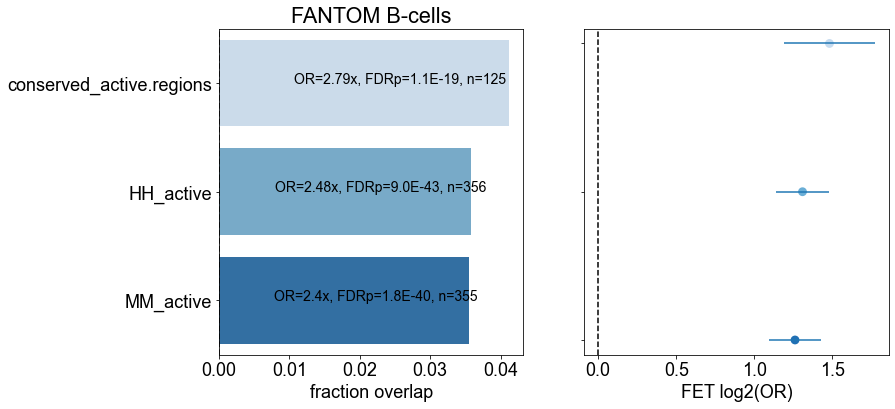

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# plot fraction
x="col"
y="frac"
order = cols
data=fdr_res.sort_values(by="frac", ascending=False)

data = data.set_index(x)
data = data.reindex(order).reset_index()

sns.barplot(x=y,y=x,data=data, 
            palette = "Blues", order=order, 
              ax=ax1
             )


# annotations
data_ORs = list(data["OR"].round(2))
data_counts = list(data["a"])
ps = list(data["FDR_P2"])

for i, p in enumerate(ax1.patches):
    percentage = f"OR={data_ORs[i]}x, FDRp={ps[i]}, n={data_counts[i]}"
    x_ = p.get_x() + p.get_width()/2 -0.01
    y_ = p.get_y() + p.get_height()/2#+0.1
    ax1.annotate(percentage, (x_, y_),
                #rotation=90,
                size = 14, 

               )
# plot shuffle

# plot zero
ax1.axvline(0, ls="--", c="k")

#set
ax1.set(title="FANTOM B-cells",
      xlabel="fraction overlap",
        ylabel=""
      )
ax1.legend().remove()



# plot OR
y="col"
x="OR_log2"


sns.pointplot(x=x, y=y, xerr='ci_upper_diff', data=data, ax=ax2, join=False, palette="Blues", order=order, )
plt.errorbar(x=x, y=y, xerr='ci_upper_diff', data=data, linestyle=" ")
ax2.axvline(0, ls="--", c="k")
ax2.set(xlabel="FET log2(OR)", 
      title = "",
        ylabel=""
      )
ax2.set_yticklabels("")
ax2.legend().remove()

# plot the OR
OR=data["OR"].iloc[0].round(2)
#ax2.annotate(f"{OR}x", xy=(1.1,-0.003))

outfig = os.path.join(RE, f"regionsxFANTOMBcell_spcies.pdf")
plt.savefig(outfig, bbox_inches="tight")

In [17]:
collection={}
cols = [#'HH_active', "MM_active", "cis_only", "trans_only", "cis+trans",
    "conserved_active.regions",
    'HH_active', "MM_active",
        'HH-active_MM-inactive_cis-only',
        'HH-active_MM-inactive_trans-only',
        'HH-active_MM-inactive_cis+trans',
        'MM-active_HH-inactive_cis-only',
        'MM-active_HH-inactive_trans-only',
        'MM-active_HH-inactive_cis+trans'
       ]
for col in cols:
    pos = annot.loc[annot[col]==1, "region_id"]
    # get dataset and matched shuffle ids
    test = df.loc[df["region_id"].isin(pos)]
    test_shuf = shuf.loc[shuf["region_id"].isin(pos)]

    # within set, how many elements have annotation, or don't.
    in_annot = test.loc[test["len"]>0].shape[0]
    out_annot = test.loc[test["len"]==0].shape[0]

    # and in the shuffles?
    inshuf_annot = test_shuf.loc[test_shuf["len"]>0].shape[0]
    outshuf_annot = test_shuf.loc[test_shuf["len"]==0].shape[0]

    result = fet.get_2x2(in_annot, out_annot, inshuf_annot,outshuf_annot, f"regions_x_shuf_{col}")
    result["col"], = col, 

    collection[col] = result

[[125, 2910], [460, 29886]]
regions_x_shuf_conserved_active.regions [[125, 2910], [460, 29886]] 2.790788883908561 1.0872889406047128e-19
[[356, 9601], [1469, 98101]]
regions_x_shuf_HH_active [[356, 9601], [1469, 98101]] 2.4761968506655867 3.015299886861623e-43
[[355, 9624], [1513, 98246]]
regions_x_shuf_MM_active [[355, 9624], [1513, 98246]] 2.395238083465054 1.2248944411761453e-40
[[44, 1070], [175, 10966]]
regions_x_shuf_HH-active_MM-inactive_cis-only [[44, 1070], [175, 10966]] 2.5767903871829105 5.539369431506512e-07
[[48, 764], [109, 8012]]
regions_x_shuf_HH-active_MM-inactive_trans-only [[48, 764], [109, 8012]] 4.618089245400836 1.216893720788919e-14
[[115, 4516], [670, 45642]]
regions_x_shuf_HH-active_MM-inactive_cis+trans [[115, 4516], [670, 45642]] 1.7347375170207422 3.4338667488491704e-07
[[51, 991], [164, 10237]]
regions_x_shuf_MM-active_HH-inactive_cis-only [[51, 991], [164, 10237]] 3.212368634786247 1.0421500628905652e-10
[[44, 1127], [177, 11533]]
regions_x_shuf_MM-active_

In [18]:
fdr_res_div = fet.fdr_correction(collection)

## fraction of annotations 
fdr_res_div["frac"] = fdr_res_div["a"]/(fdr_res_div["a"]+fdr_res_div["b"])
fdr_res_div["frac_shuf"] = fdr_res_div["c"]/(fdr_res_div["c"]+fdr_res_div["d"])
fdr_res_div["FDR_P2"]= fdr_res_div["FDR_P"].apply(lambda x: "{:.1E}".format(x))

## write

In [21]:
col_order = [
            'comparison',
            'col',
            'frac',
            'OR',
            'FDR_P',
             'a',
            'b',
            'c',
            'd',
            'P',
            'ci_lower',
            'ci_lower_diff',
            'ci_upper',
            'ci_upper_diff',
            'OR_log2',
            'ci_lower_log2',
            'ci_upper_log2',
            'reject_null',
            'asterisks',
            '-log10p',
            'frac_shuf',
            'FDR_P2'
            ]
fdr_res_div[col_order].to_csv(out_results, sep='\t', index=False)

# cis, trans , cis +trans

No handles with labels found to put in legend.


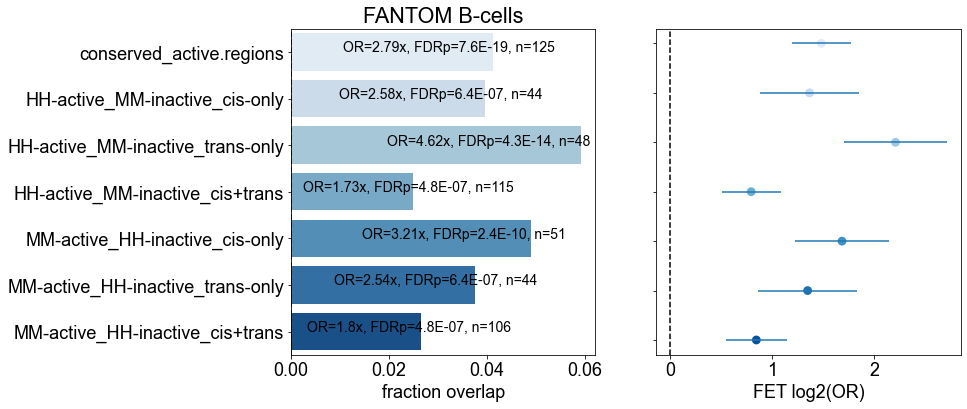

In [20]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# plot fraction
x="col"
y="frac"
order = ['conserved_active.regions',
    'HH-active_MM-inactive_cis-only',
    'HH-active_MM-inactive_trans-only',
    'HH-active_MM-inactive_cis+trans',
    'MM-active_HH-inactive_cis-only',
    'MM-active_HH-inactive_trans-only',
    'MM-active_HH-inactive_cis+trans',
    ]

data=fdr_res_div.sort_values(by="frac", ascending=False)

# indexing hell
data = data.set_index(x)
data = data.reindex(order).reset_index()

sns.barplot(x=y,y=x,data=data, 
            palette = "Blues", order=order, 
              ax=ax1
             )


# annotations
data_ORs = list(data["OR"].round(2))
data_counts = list(data["a"])
ps = list(data["FDR_P2"])

for i, p in enumerate(ax1.patches):
    percentage = f"OR={data_ORs[i]}x, FDRp={ps[i]}, n={data_counts[i]}"
    x_ = p.get_x() + p.get_width()/2 -0.01
    y_ = p.get_y() + p.get_height()/2#+0.1
    ax1.annotate(percentage, (x_, y_),
                #rotation=90,
                size = 14, 

               )
# plot shuffle

# plot zero
ax1.axvline(0, ls="--", c="k")

#set
ax1.set(title="FANTOM B-cells",
      xlabel="fraction overlap",
        ylabel=""
      )
ax1.legend().remove()



# plot OR
y="col"
x="OR_log2"
#data=fdr_res_div.sort_values(by="OR_log2", ascending=True)

sns.pointplot(x=x, y=y, xerr='ci_upper_diff', data=data, ax=ax2, join=False, palette="Blues", order=order, )
plt.errorbar(x=x, y=y, xerr='ci_upper_diff', data=data, linestyle=" ")
ax2.axvline(0, ls="--", c="k")
ax2.set(xlabel="FET log2(OR)", 
      title = "",
        ylabel=""
      )
ax2.set_yticklabels("")
ax2.legend().remove()

# plot the OR
OR=data["OR"].iloc[0].round(2)
#ax2.annotate(f"{OR}x", xy=(1.1,-0.003))

outfig = os.path.join(RE, f"cis_trans_regionsxFANTOMBcell.pdf")
plt.savefig(outfig, bbox_inches="tight")